In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys 
%pylab inline

matplotlib.rcParams.update({'font.size': 25})
matplotlib.rcParams['xtick.major.size'] = 10
matplotlib.rcParams['xtick.major.width'] = 3
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['xtick.minor.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 10
matplotlib.rcParams['ytick.major.width'] = 3
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.width'] = 2
import h5py


fig_lett_font = {'fontname':'Helvetica'}

color_list = ['#0066CC','#00974F','#CC0000','#FF7F00']

mpl.rcParams['axes.color_cycle'] = color_list

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
C:\Users\slab\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
shot_data1 = np.load("data/161221-shot_data1-shots-1000-samples-500-start-10-stop-200-rabi-a-0.2-start-100-step-1-stop-200-gauss-phase-45.npy")
shot_data2 = np.load("data/161221-shot_data2-shots-1000-samples-500-start-10-stop-200-rabi-a-0.2-start-100-step-1-stop-200-gauss-phase-45.npy")

In [3]:
shots = 1000
samples = 500
start = 10
stop = 200

C:\Users\slab\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\slab\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


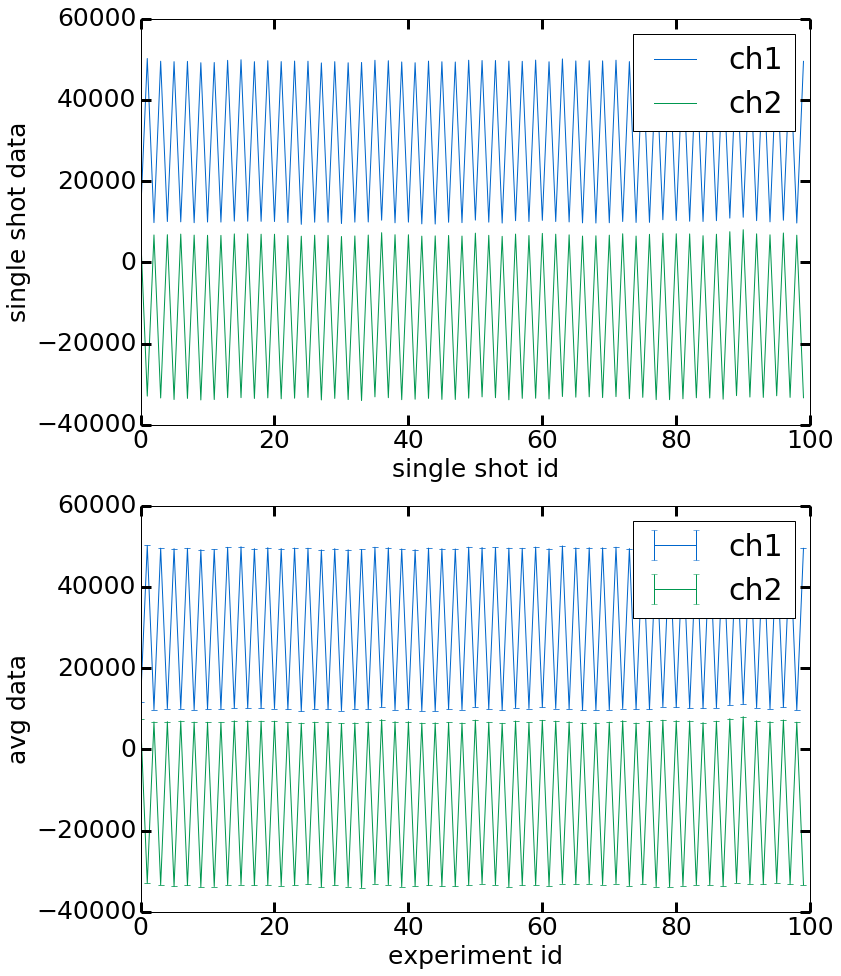

In [4]:
fig = pyplot.figure(figsize=(12,16))


num_experiments = 100

data_crop1 = shot_data1[0:math.floor(shots/num_experiments)*num_experiments]
data_crop1_matrix = np.reshape(data_crop1, (-1, num_experiments))

data_crop1_avg = np.mean(data_crop1_matrix, axis=0)
data_crop1_std = np.std(data_crop1_matrix, axis=0)

data_crop2 = shot_data2[0:math.floor(shots/num_experiments)*num_experiments]
data_crop2_matrix = np.reshape(data_crop2, (-1, num_experiments))

data_crop2_avg = np.mean(data_crop2_matrix, axis=0)
data_crop2_std = np.std(data_crop2_matrix, axis=0)

ax  = fig.add_subplot(211)

ax.plot (shot_data1,label='ch1')
ax.plot (shot_data2,label='ch2')
ax.legend()
ax.set_ylabel('single shot data')
ax.set_xlabel('single shot id')

#print np.allclose(shot_data1,shot_data2)

ax  = fig.add_subplot(212)
ax.errorbar(arange(num_experiments),data_crop1_avg,yerr=data_crop1_std,label='ch1')
ax.errorbar(arange(num_experiments),data_crop2_avg,yerr=data_crop2_std,label='ch2')
# ax.set_xlim(-1,num_experiments+1)
ax.legend(loc=0)
ax.set_ylabel('avg data')
ax.set_xlabel('experiment id')